# Artifacts and beats correction using "*Kubios: Lipponen & Tarvainen (2019).*" algorithm for heart rate variability

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

#mac
sys.path.append('/Users/tiagorodrigues/Documents/GitHub/NeuroKit')

from pathlib import Path

# 1) Rest test (1 hour):

**Notes:**
- (+) Beats classified as long/short are corrected by interpolation
- (+) False positives/negatives are correctly corrected and interpolated
- (+) Reduced number of ectopic beats

It is a robust method for artifact correction under rest conditions, HR at around 60 bpm

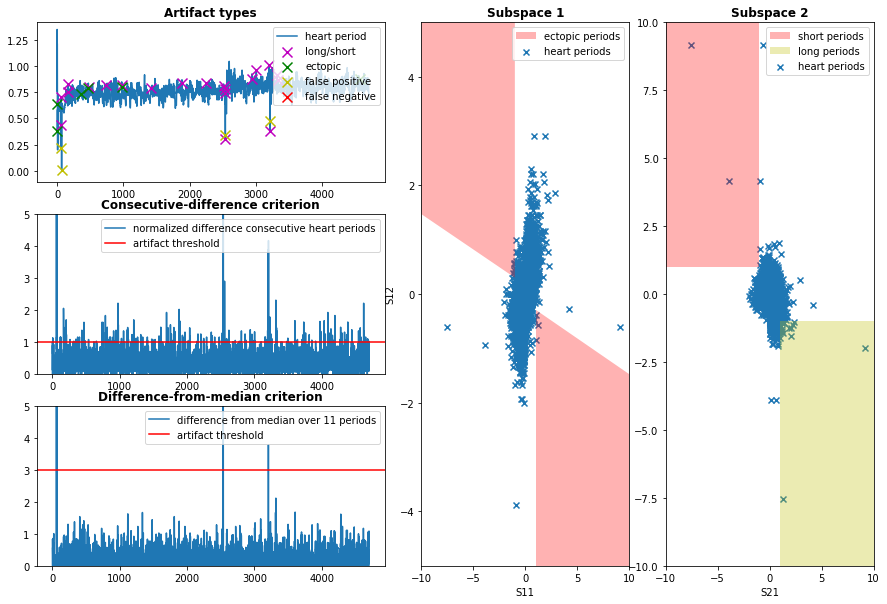

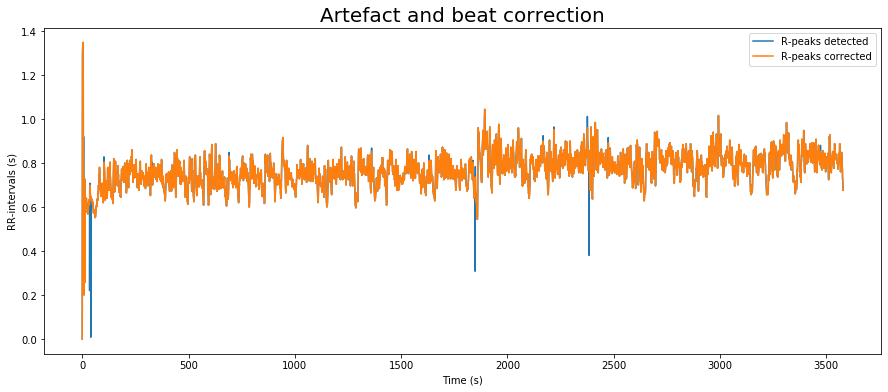

In [4]:
# Load ECG Signal
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Experiments/20200416-TR-FWv2series.txt', sep=" ", header=4)
data.columns = ["ECG"]
ecg = data["ECG"]
sampling_rate = 250

# R-peaks from ASI_detector
rpeaks = nk.ecg_findpeaks(ecg, 250, "asi")


# R-peaks corrected
rpeaks_array = np.asarray(rpeaks["ECG_R_Peaks"])
rpeaks_clean = nk.signal_fixpeaks(rpeaks_array, sampling_rate=250, iterative=False, show=True,method="Kubios")
rpeaks_corrected = rpeaks_clean[1]

# Artifact and beat correction
rr = np.ediff1d(rpeaks['ECG_R_Peaks'], to_begin=0) / sampling_rate
rr_corrected = np.ediff1d(rpeaks_corrected, to_begin=0) / sampling_rate

rr_intervals = np.true_divide(rpeaks['ECG_R_Peaks'], sampling_rate)
rr_intervalscorrected = np.true_divide(rpeaks_corrected, sampling_rate)

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(rr_intervals,rr,label = 'R-peaks detected')
ax1.plot(rr_intervalscorrected,rr_corrected, label = 'R-peaks corrected')
ax1.set_title('Artefact and beat correction',fontsize=20, loc='center', pad=None)
plt.legend()

ax1.set_ylabel("RR-intervals (s)");
ax1.set_xlabel("Time (s)");

# 2.1.1) Exercise test (10 min walk and 30 min run):
## Subject 1
**Notes**
- (+) Missed beats are correctly corrected
- (-) Ectopic beats, resulting from poor decision rule under high heart rate, are wrongly replaced by interpolation of the rr-intervals. This leads to changes in the hrv parameters.
- (-) Some missed beats, can be assigned as long/short intervals. This results in these beats being interpolated instead of removed. Consequently, this leads to spectral artifacts in the hrv domain. 

Correction of most part of the beats under high intensity activity, produces different hrv results.

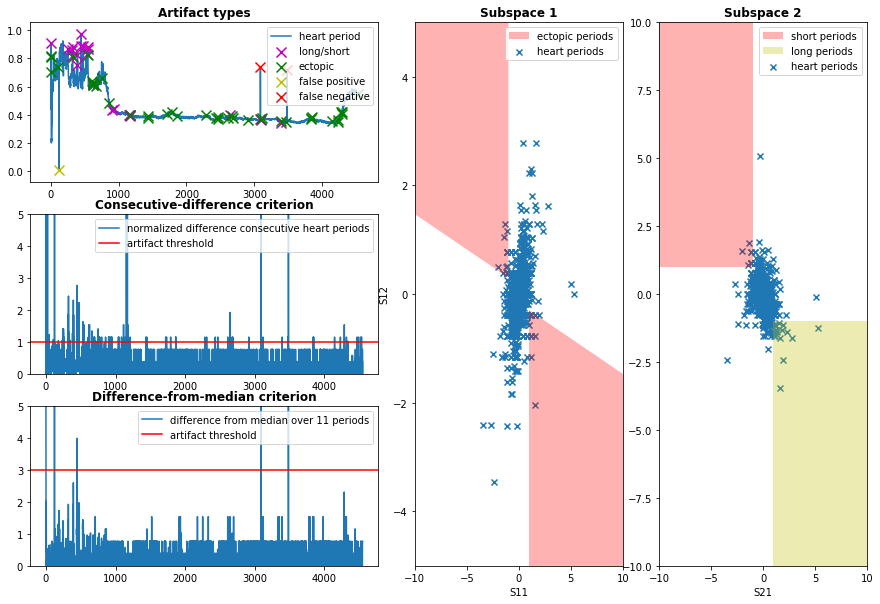

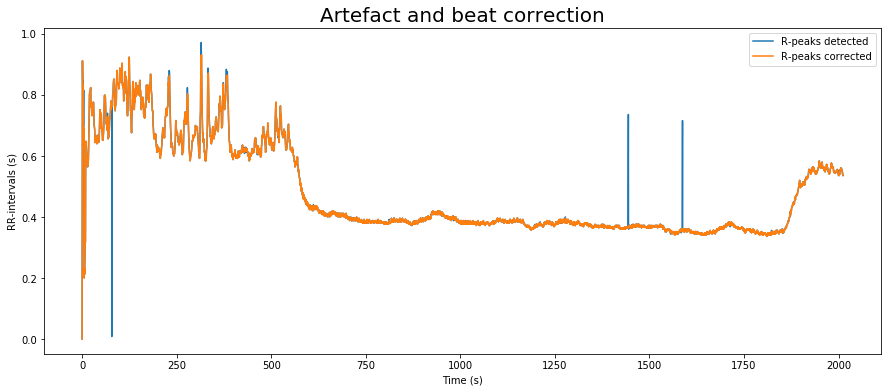

In [5]:
# Load ECG Signal
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200405-TR-FWv2.txt', sep=" ", header=4)
data.columns = ["ECG"]
ecg = data["ECG"]
sampling_rate = 250

# R-peaks from ASI_detector
rpeaks = nk.ecg_findpeaks(ecg, 250, "asi")

# R-peaks corrected
rpeaks_array = np.asarray(rpeaks["ECG_R_Peaks"])
rpeaks_clean = nk.signal_fixpeaks(rpeaks_array, sampling_rate=250, iterative=False, show=True,method="Kubios")
rpeaks_corrected = rpeaks_clean[1]


# Artifact and beat correction
rr = np.ediff1d(rpeaks['ECG_R_Peaks'], to_begin=0) / sampling_rate
rr_corrected = np.ediff1d(rpeaks_corrected, to_begin=0) / sampling_rate

rr_intervals = np.true_divide(rpeaks['ECG_R_Peaks'], sampling_rate)
rr_intervalscorrected = np.true_divide(rpeaks_corrected, sampling_rate)

fig1, ax1 = plt.subplots(figsize=(15,6))

ax1.plot(rr_intervals,rr,label = 'R-peaks detected')
ax1.plot(rr_intervalscorrected,rr_corrected, label = 'R-peaks corrected')
ax1.set_title('Artefact and beat correction',fontsize=20, loc='center', pad=None)
plt.legend()

ax1.set_ylabel("RR-intervals (s)");
ax1.set_xlabel("Time (s)");

# 2.1.1) Exercise test (60 min fast changing heart rate):
## Subject 1

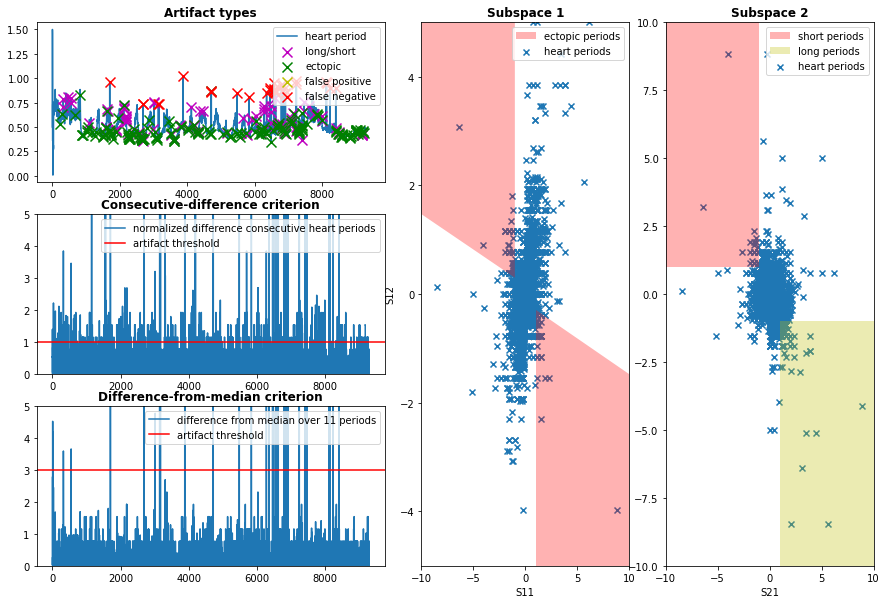

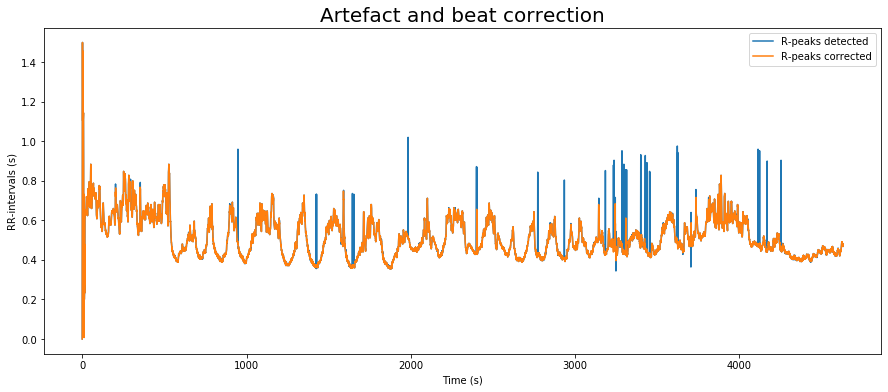

In [6]:
# Load ECG Signal
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200520-TR-Belt.txt', sep=" ", header=4)
data.columns = ["ECG"]
ecg = data["ECG"]
sampling_rate = 250

# R-peaks from ASI_detector
rpeaks = nk.ecg_findpeaks(ecg, 250, "asi")

# R-peaks corrected
rpeaks_array = np.asarray(rpeaks["ECG_R_Peaks"])
rpeaks_clean = nk.signal_fixpeaks(rpeaks_array, sampling_rate=250, iterative=False, show=True,method="Kubios")
rpeaks_corrected = rpeaks_clean[1]


# Artifact and beat correction
rr = np.ediff1d(rpeaks['ECG_R_Peaks'], to_begin=0) / sampling_rate
rr_corrected = np.ediff1d(rpeaks_corrected, to_begin=0) / sampling_rate

rr_intervals = np.true_divide(rpeaks['ECG_R_Peaks'], sampling_rate)
rr_intervalscorrected = np.true_divide(rpeaks_corrected, sampling_rate)

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(rr_intervals,rr,label = 'R-peaks detected')
ax1.plot(rr_intervalscorrected,rr_corrected, label = 'R-peaks corrected')
ax1.set_title('Artefact and beat correction',fontsize=20, loc='center', pad=None)
plt.legend()

ax1.set_ylabel("RR-intervals (s)");
ax1.set_xlabel("Time (s)");

# 2.2) Exercise test (1h30 trail running):
## Subject 2:
- (-) Beats are classified as **ectopic** instead of **extra/missed beats**. They are interpolated, instead of eliminated, resulting in artifacts in the corrected RR-intervals time-series. -> this artefacts affect the hrv metrics, mainly the spectral components
- (-) Regions of the signal characterized by noise and missed beats, are not corrected.


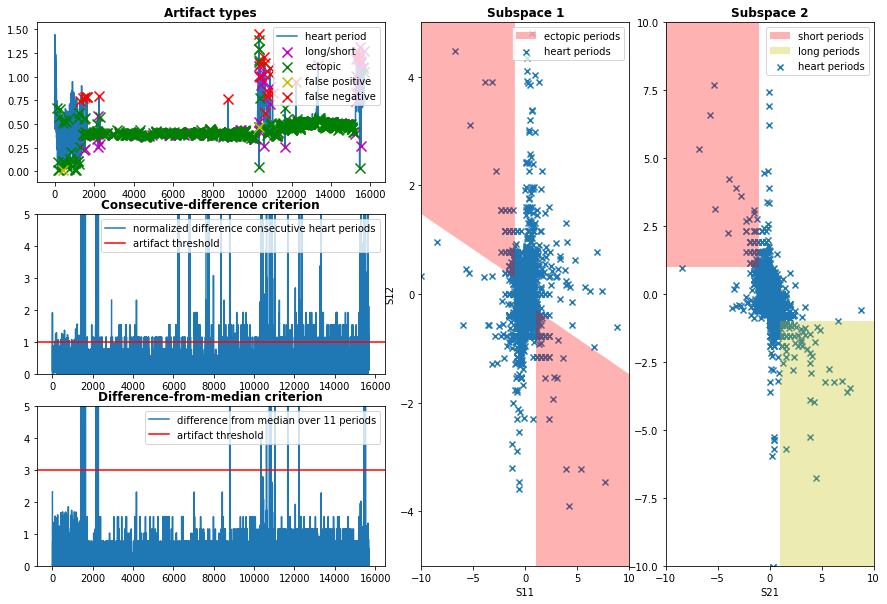

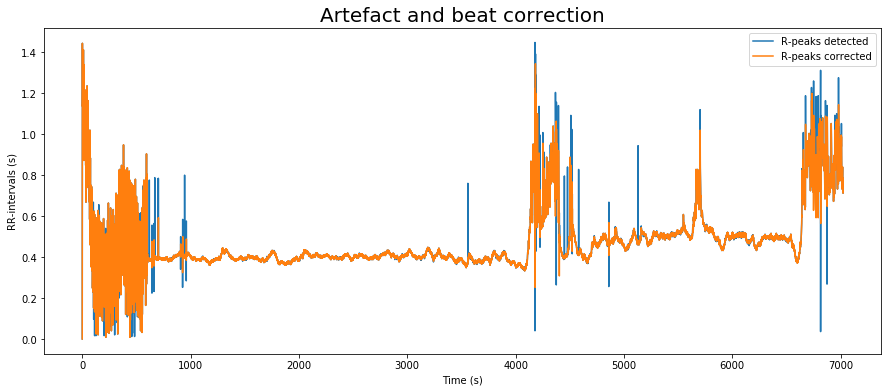

In [7]:
# Load ECG Signal
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200425-JT-FWv2.txt', sep=" ", header=4)
data.columns = ["ECG"]
ecg = data["ECG"]
sampling_rate = 250

# R-peaks from ASI_detector
rpeaks = nk.ecg_findpeaks(ecg, 250, "asi")

# R-peaks corrected
rpeaks_array = np.asarray(rpeaks["ECG_R_Peaks"])
rpeaks_clean = nk.signal_fixpeaks(rpeaks_array, sampling_rate=250, iterative=False, show=True,method="Kubios")
rpeaks_corrected = rpeaks_clean[1]


# Artifact and beat correction
rr = np.ediff1d(rpeaks['ECG_R_Peaks'], to_begin=0) / sampling_rate
rr_corrected = np.ediff1d(rpeaks_corrected, to_begin=0) / sampling_rate

rr_intervals = np.true_divide(rpeaks['ECG_R_Peaks'], sampling_rate)
rr_intervalscorrected = np.true_divide(rpeaks_corrected, sampling_rate)

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(rr_intervals,rr,label = 'R-peaks detected')
ax1.plot(rr_intervalscorrected,rr_corrected, label = 'R-peaks corrected')
ax1.set_title('Artefact and beat correction',fontsize=20, loc='center', pad=None)
plt.legend()

ax1.set_ylabel("RR-intervals (s)");
ax1.set_xlabel("Time (s)");

# 2.3) Exercise test (30min run):
## Subject 3:
- (-) Several missed classified ectopic beats. The rr-intervals are interpolated 
- (-) Missed beats classified as ectopic beats, incorrect correction (interpolation instead of removal)



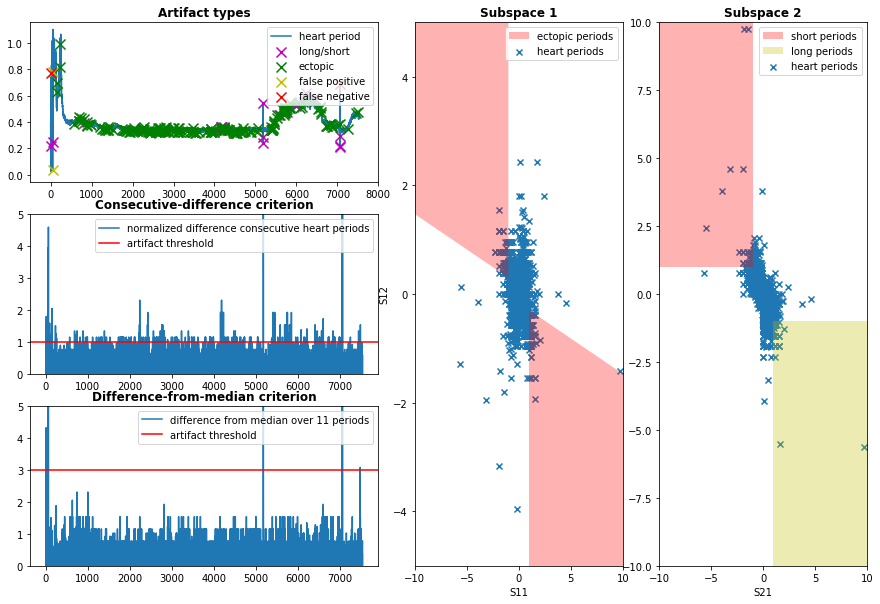

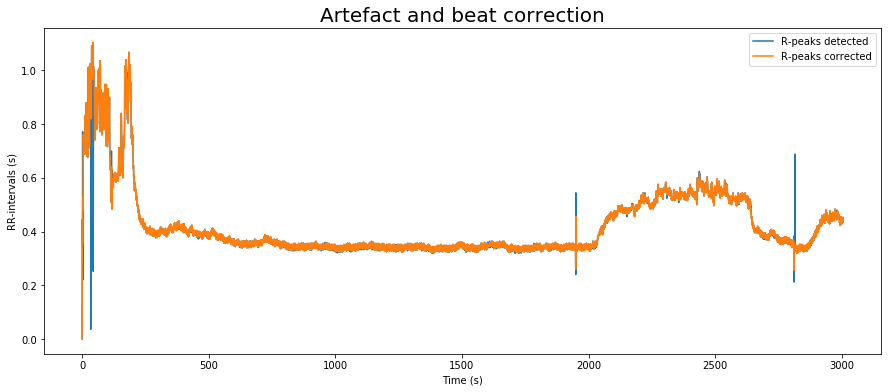

In [8]:
# Load ECG Signal
data = pd.read_csv('/Users/tiagorodrigues/OneDrive - Universidade de Lisboa/TiagoRodrigues_EPFL_FieldWiz_tese_2020/Data/Activities/20200508-SS-Belt.txt', sep=" ", header=4)
data.columns = ["ECG"]
ecg = data["ECG"]
sampling_rate = 250


# R-peaks from ASI_detector
rpeaks = nk.ecg_findpeaks(ecg, 250, "asi")

# R-peaks corrected
rpeaks_array = np.asarray(rpeaks["ECG_R_Peaks"])
rpeaks_clean = nk.signal_fixpeaks(rpeaks_array, sampling_rate=250, iterative=False, show=True,method="Kubios")
rpeaks_corrected = rpeaks_clean[1]


# Artifact and beat correction
rr = np.ediff1d(rpeaks['ECG_R_Peaks'], to_begin=0) / sampling_rate
rr_corrected = np.ediff1d(rpeaks_corrected, to_begin=0) / sampling_rate

rr_intervals = np.true_divide(rpeaks['ECG_R_Peaks'], sampling_rate)
rr_intervalscorrected = np.true_divide(rpeaks_corrected, sampling_rate)

fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.plot(rr_intervals,rr,label = 'R-peaks detected')
ax1.plot(rr_intervalscorrected,rr_corrected, label = 'R-peaks corrected')
ax1.set_title('Artefact and beat correction',fontsize=20, loc='center', pad=None)
plt.legend()

ax1.set_ylabel("RR-intervals (s)");
ax1.set_xlabel("Time (s)");

## Final Remarks:
- (-) Several false positive ectopic beats, when applied in high heart rate situations
- (-) Not robust distinction between ectopic and missed beats. Missed beats, wrongly classified as ectopic beats, are interpolated instead of being removed.


- equation 5, the assumption is made for mRRs at 60bpm. This is then used to classify long/short beats at different HR values.
- in section 2.1, ectopic beats are defined as either NPN or PNP of the dRR series. This addicitional decision rule, derives form the fact that ectopic beats produce either positive-negative-positive segments or vice-versa.  However, during exercise (high heart rate and less modulation of the parasympathetic activity) it may happen that the RR-intervals oscillate between P and N slopes with low amplitude changes -> triggering false ectopic beats (attached a zoom in and zoom out picture).

# Comparison of two different implementations

@misc{neurokit2,
  doi = {10.5281/ZENODO.3597887},
  url = {https://github.com/neuropsychology/NeuroKit},
  author = {Makowski, Dominique and Pham, Tam and Lau, Zen J. and Brammer, Jan C. and Lespinasse, Fran\c{c}ois and Pham, Hung and Schölzel, Christopher and S H Chen, Annabel},
  title = {NeuroKit2: A Python Toolbox for Neurophysiological Signal Processing},
  publisher = {Zenodo},
  year = {2020},
}

@software{nicolas_legrand_2020_3610264,
  author       = {Nicolas Legrand and
                  micahgallen},
  title        = {{embodied-computation-group/systole: Initial 
                   release}},
  month        = jan,
  year         = 2020,
  publisher    = {Zenodo},
  version      = {0.1.0},
  doi          = {10.5281/zenodo.3610264},
  url          = {https://doi.org/10.5281/zenodo.3610264}
}

## Number of ectopic beats using both implementations
c1=0.13, c2=0.17, alpha=5.2
- 1) Neurokit = 8 ; Systole 9
- 2.1) Neurokit = 104 ; Systole = 104
- 2.2) Neurokit = 765 ; Systole = 758
- 2.3) Neurokit = 403 ; Systole = 404

**Notes**
- False positive ectopic beats are present in scenarios of high heart rate.
- Distinction between ectopic and missed/extra beats is not robust, this results in a different correction method. Either interpolation of the previous and next beat, in the case of ectopic and another R-peak being added/removed in the case of missed/extra beats. In the scenario where missed R-peaks are errouneously classified as ectopic, these are correct by interpolation instead of being removed. Leading to artifacts in the RR-intervals time series, seen in 2.1.1, 2.1.2, 2.2 and 2.3.

In [1]:
# alpha = 5.2 in the paper

# Evolution of alpha and the number of ectopic/missed beats
header,ecg,time = aux.open_file("Activities","20200425-JT-FWv2.txt",0)
sampling_rate = 250

# R-peaks from ASI_detector
rpeaks = nk.ecg_findpeaks(ecg, 250, "asi")
rr = np.diff(rpeaks['ECG_R_Peaks'])


alphalength = 10
ecto = np.zeros(alphalength)
missed = np.zeros(alphalength)
alph = np.zeros(alphalength)

for i in range (0,10,1):
    rrartifacts = aux.rr_artefacts(rr, c1=0.13, c2=0.17, alpha=i)
    ecto[i] = np.sum(rrartifacts['ectopic'])
    missed[i] = np.sum(rrartifacts['missed'])
    alph[i] = i  
res = d = {'alpha': alph, 
           'ectopic': ecto, 
           'missed': missed}

NameError: name 'aux' is not defined

In [ ]:
res = pd.DataFrame(res)
plt.plot(ecto)
plt.xlabel('Alpha (a)')
plt.ylabel('Number of ectopic beats')
res